In [8]:
from asyncio import get_event_loop
from websockets import serve
from matplotlib import pyplot as plt
from matplotlib import patches
from skimage import io, transform
from pylibdmtx.pylibdmtx import decode
from multiprocessing import Pool
from io import BytesIO
from json import dumps, loads, load
from uuid import uuid4
from math import cos, sin, pi
%matplotlib inline

In [5]:
from glob import glob
sorted(glob("../*"))

['../634c43d7-ddf0-413c-b487-e9f84037fe01.json',
 '../634c43d7-ddf0-413c-b487-e9f84037fe01.png',
 '../6f821a27-e8cc-42f2-a201-5b3b6a39b44a.json',
 '../6f821a27-e8cc-42f2-a201-5b3b6a39b44a.png',
 '../README.md',
 '../client',
 '../server']

In [40]:
filesets = [
    ['../634c43d7-ddf0-413c-b487-e9f84037fe01.json', '../634c43d7-ddf0-413c-b487-e9f84037fe01.png'],
    [ '../6f821a27-e8cc-42f2-a201-5b3b6a39b44a.json','../6f821a27-e8cc-42f2-a201-5b3b6a39b44a.png',],
]
fileset = 0

In [41]:
meta = load(open(filesets[fileset][0]))
grid = meta['grid']
iscale = meta['scale']

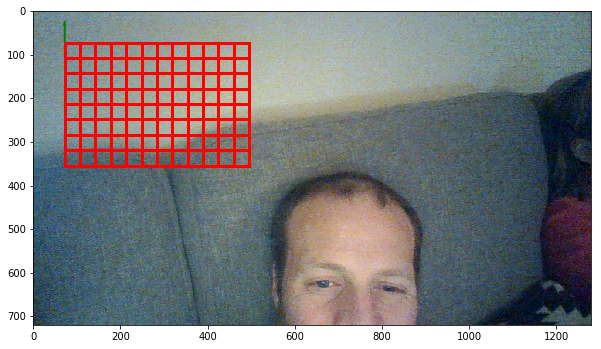

In [42]:
im = io.imread(filesets[fileset][1])
scale = im.shape[1]/iscale
fig,ax = plt.subplots(1, figsize=(10,20))
ax.imshow(im)
rect = patches.Rectangle((grid['left']*scale,grid['top']*scale),width=grid['width']*grid['scaleX']*scale,height=grid['height']*grid['scaleY']*scale,angle=grid['angle'],linewidth=1,edgecolor='r',facecolor='none')
ar_pa = patches.Arrow(grid['left']*scale, grid['top']*scale, cos(((grid['angle']-90)/360)*(2*pi))*50, sin(((grid['angle']-90)/360)*(2*pi))*50, color = 'green', width=10)
ax.add_patch(ar_pa)
ax.add_patch(rect)
 
if (grid['width'] > grid['height']):
    grid_size = (grid['width']/12)*scale
    orientation = "landscape"
    no_rows = 8
    no_cols = 12
else:
    grid_size = (grid['height']/12)*scale
    orientation = "portrait"
    no_rows = 12
    no_cols = 8

width=grid_size*grid['scaleX']
height=grid_size*grid['scaleY']
ori_x = grid['left']*scale
ori_y = grid['top']*scale
angle = (grid['angle']/360)*2*pi
ress = []
wells = []
for row in range(no_rows):
    for col in range(no_cols):        
        dx = ori_x+width*col*cos(angle)-height*row*sin(angle)
        dy = ori_y+width*col*sin(angle)+height*row*cos(angle)
        
        dx1 = ori_x+width*col*cos(angle)-height*row*sin(angle)
        dx2 = ori_x+width*(col)*cos(angle)-height*(row+1)*sin(angle)
        dx3 = ori_x+width*(col+1)*cos(angle)-height*(row+1)*sin(angle)
        dx4 = ori_x+width*(col+1)*cos(angle)-height*row*sin(angle)
        dxs = [dx1,dx2,dx3,dx4]
        dy1 = ori_y+width*col*sin(angle)+height*row*cos(angle)
        dy2 = ori_y+width*col*sin(angle)+height*(row+1)*cos(angle)
        dy3 = ori_y+width*(col+1)*sin(angle)+height*(row+1)*cos(angle)
        dy4 = ori_y+width*(col+1)*sin(angle)+height*row*cos(angle)
        dys = [dy1,dy2,dy3,dy4]

        #(min(dxs), min(dys)), width=max(dxs)-min(dxs), height=max(dys)-min(dys), linewidth=3,edgecolor='g',facecolor='none')
        well = im[int(min(dys)):int(max(dys)), int(min(dxs)):int(max(dxs))]
        
        res = decode(well, max_count=1)
        
        if res:
            mrect = patches.Rectangle((dx, dy), width=width, height=height, angle=grid['angle'],linewidth=1,edgecolor='green',facecolor='none')
        else:
            found = False
            for i in range(2):
                res = decode(transform.rotate(well, i), max_count=1)
                if res:
                    mrect = patches.Rectangle((dx, dy), width=width, height=height, angle=grid['angle'],linewidth=1,edgecolor='green',facecolor='none')
                    break
            if not found:
                mrect = patches.Rectangle((dx, dy), width=width, height=height, angle=grid['angle'],linewidth=3,edgecolor='r',facecolor='none')
                wells.append([row,col, well])
        ax.add_patch(mrect)
        ress.append(res)

plt.show()

In [34]:
grid['width']*scale

864.0

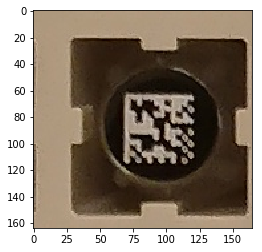

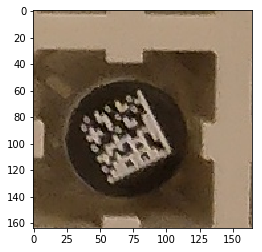

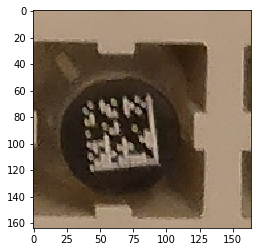

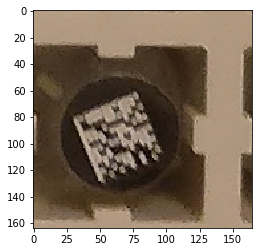

In [24]:
for i in wells:
    f, ax = plt.subplots()
    plt.imshow(i[2])

In [98]:
im2 = io.imread("../client/png2.png")
well = im[int(min(dys)):int(max(dys)), int(min(dxs)):int(max(dxs))]

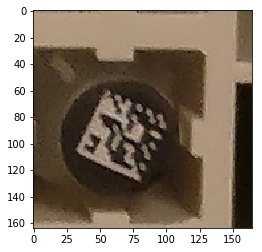

In [99]:
plt.imshow(well)

In [100]:
decode(well, timeout=1000, deviation=40, threshold=20)

[Decoded(data=b'0153126648', rect=Rect(left=31, top=57, width=72, height=25))]

In [108]:
im.shape

(1413, 2073, 4)

In [106]:
io.imread("../client/png2.png")

array([[[ 57,  38,  21, 255],
        [ 56,  37,  22, 255],
        [ 56,  37,  22, 255],
        ...,
        [ 50,  34,  21, 255],
        [ 49,  33,  20, 255],
        [ 48,  32,  19, 255]],

       [[ 57,  38,  21, 255],
        [ 56,  37,  22, 255],
        [ 56,  37,  22, 255],
        ...,
        [ 49,  33,  20, 255],
        [ 48,  32,  19, 255],
        [ 47,  31,  18, 255]],

       [[ 56,  37,  20, 255],
        [ 56,  37,  20, 255],
        [ 56,  37,  20, 255],
        ...,
        [ 48,  32,  19, 255],
        [ 47,  31,  18, 255],
        [ 47,  31,  18, 255]],

       ...,

       [[122, 100,  77, 255],
        [121,  99,  76, 255],
        [121,  99,  76, 255],
        ...,
        [ 74,  53,  36, 255],
        [ 71,  49,  35, 255],
        [ 72,  50,  36, 255]],

       [[123, 101,  78, 255],
        [123, 101,  78, 255],
        [122, 100,  77, 255],
        ...,
        [ 76,  55,  38, 255],
        [ 73,  51,  37, 255],
        [ 75,  53,  39, 255]],

       [[123